In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

#Explorar el dataset: tamaño, estadísticas básicas, nulos, etc.

In [21]:

url = '../data/tips.csv'
df = pd.read_csv(url)
#df.head()

df.info()
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

#Nos descargamos el HTML para facilitar su consulta.
profile.to_file("pandas_profiling_report.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Sun'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
days = df['day'].values
unique_days = np.unique(days)
print(unique_days)

# tip = df['tip'].values
# unique_tips = np.unique(tip)
# print(unique_tips)

mean = df['tip'].mean()
median = df['tip'].median()
mode = df['tip'].mode()
print(round(mean, 3), median, mode)

nan_count = df.isna().sum()
print(f"Recuento de nulos: \n{nan_count}" )

['Fri' 'Sat' 'Sun' 'Thur']
2.998 2.9 0    2.0
Name: tip, dtype: float64
Recuento de nulos: 
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [54]:
#Aunque en lugar de calcularlo manualmmente cada uno, podemos utilizar describe para acelearar
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Gráficas con MATPLOG LIB

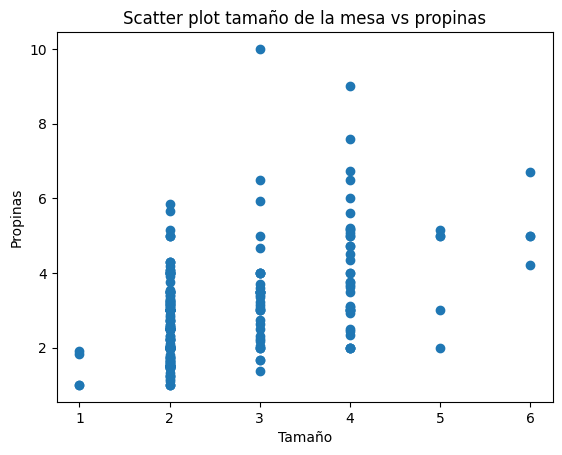

In [33]:
plt.scatter(df['size'], df['tip'])
plt.xlabel('Tamaño')
plt.ylabel('Propinas')
plt.title('Scatter plot tamaño de la mesa vs propinas')
plt.show()

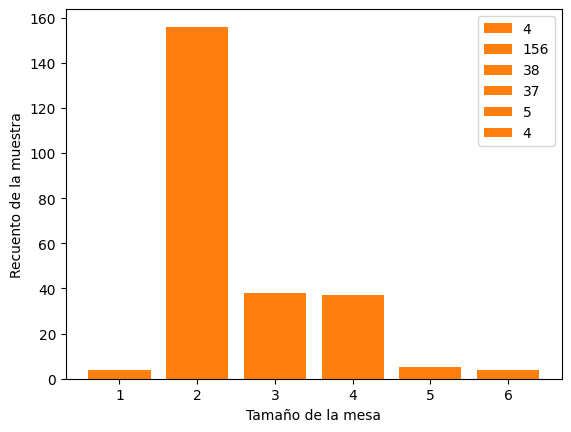

'\nObservamos que el tamaño de la muestra es muy bajo para las mesas de un tamaño igual a 1, 5 y 6 personas.\nEso puede provocar que en un futuro un análisis basado en esta variable pueda provocar ciertos problemas.\n'

In [59]:
df_tip_by_size = pd.DataFrame(df.groupby('size')['tip'].count()).reset_index()

plt.bar(df_tip_by_size['size'], df_tip_by_size['tip'])
plt.xlabel('Tamaño de la mesa')
plt.ylabel('Recuento de la muestra')
bars = plt.bar(df_tip_by_size['size'], df_tip_by_size['tip'])
labels = [str(bar.get_height()) for bar in bars]
plt.legend(bars, labels)
plt.show()

"""
Observamos que el tamaño de la muestra es muy bajo para las mesas de un tamaño igual a 1, 5 y 6 personas.
Eso puede provocar que en un futuro un análisis basado en esta variable pueda provocar ciertos problemas.
"""


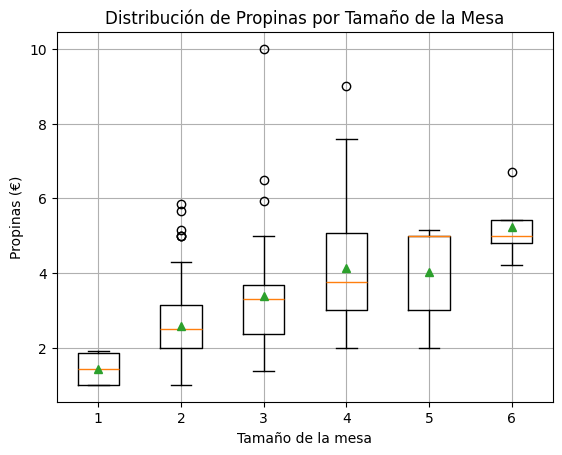

list

In [69]:
# SINTAXIS DE UN LIST COMPREHENSION: [expression for item in list]

tips_by_size = [df[df['size'] == size]['tip'] for size in sorted(df['size'].unique())]

# Crear el gráfico de caja
plt.boxplot(tips_by_size, showmeans=True)

# Añadir etiquetas y título
plt.xlabel('Tamaño de la mesa')
plt.ylabel('Propinas (€)')
plt.title('Distribución de Propinas por Tamaño de la Mesa')

plt.grid()
plt.show()


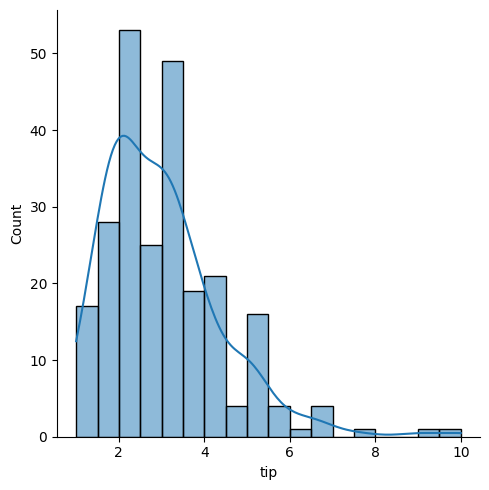

In [55]:
#Llevar a cabo alguna visualización univariante y multivariante con Matplotlib y Seaborn.
sns.displot(df['tip'], kde=True)

In [13]:
#Crear un modelo con scikit-learn para predecir la columna tip.

In [14]:
#Evaluar la precisión del modelo con las métricas de regresión.

In [15]:
"""
La columna tip es una variable continua, por tanto, se trata de un ejercicio de regresión. 
Con utilizar un modelo básico de regresión es suficiente. No se busca la máxima precisión para este ejercicio, 
se busca practicar los pasos comunes a la hora de crear modelos con scikit-learn.
"""

'\nLa columna tip es una variable continua, por tanto, se trata de un ejercicio de regresión. \nCon utilizar un modelo básico de regresión es suficiente. No se busca la máxima precisión para este ejercicio, \nse busca practicar los pasos comunes a la hora de crear modelos con scikit-learn.\n'